In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
import os
from sqlalchemy import create_engine

db_path = os.path.abspath(os.path.join("..", "databases", "perovskites_data.db"))
engine = create_engine("sqlite:///" + db_path, echo=False)

df_perovskites = pd.read_sql("SELECT * FROM perovskites_data", con=engine)
df_experiment = pd.read_sql("SELECT * FROM experiment_data", con=engine)

#### Define features and target

In [78]:
features_for_predict = [
    "Perovskite_composition_long_form",  # main key for merge
    "Perovskite_thickness", "ETL_thickness", "HTL_thickness_list",
    "Perovskite_deposition_thermal_annealing_temperature", "Perovskite_deposition_solvents", "Cell_architecture",
    "JV_hysteresis_index",
    "JV_default_PCE"  # target
]
df_main = df_experiment[features_for_predict]
df_main

,Perovskite_composition_long_form,Perovskite_thickness,ETL_thickness,HTL_thickness_list,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_solvents,Cell_architecture,JV_hysteresis_index,JV_default_PCE
0,MAPbI3,400,nan | nan,50,70; 100,DMF; DMSO,pin,0.035203,12.00
1,MAPbI3,400,nan | nan,50,70; 100,DMF; DMSO,pin,0.046167,9.00
2,MAPbI3,None,80,None,100,DMSO; GBL,nip,1.011708,13.30
3,MAPbI3,None,80,None,100,DMSO; GBL,nip,0.408254,17.20
4,Cs0.05FA0.788MA0.162PbBr0.51I2.49,None,None,None,120,DMF; DMSO,nip,NaN,18.45
...,...,...,...,...,...,...,...,...,...
49857,MAPbBr2.16I0.84,None,100.0 | 500.0,None,70.0 >> 70.0,DMF >> IPA,nip,NaN,1.39
49858,Cs0.6MA0.4PbI3,None,None,None,100.0,DMF,nip,NaN,3.34
49859,FAPbI3,None,None,200.0,160.0,DMF,nip,5.068629,13.50
49860,FA0.85MA0.15PbBr0.45I2.55,None,None,None,70.0 >> 100.0,DMF; DMSO >> IPA,nip,NaN,20.10


In [79]:
df_main = df_main.dropna(subset=features_for_predict)
df_main

,Perovskite_composition_long_form,Perovskite_thickness,ETL_thickness,HTL_thickness_list,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_solvents,Cell_architecture,JV_hysteresis_index,JV_default_PCE
0,MAPbI3,400,nan | nan,50,70; 100,DMF; DMSO,pin,0.035203,12.00
1,MAPbI3,400,nan | nan,50,70; 100,DMF; DMSO,pin,0.046167,9.00
181,MAPbI3,550,30,280,60; 100,DMF; DMSO,nip,0.045401,15.32
244,Cs0.05FA0.855MA0.095PbBr0.285I2.565,490,30,184,100,DMF; DMSO,nip,0.046150,14.70
245,Cs0.05FA0.855MA0.095PbBr0.285I2.565,490,3.0 | 50.0,184,100,DMF; DMSO,nip,0.035801,17.20
...,...,...,...,...,...,...,...,...,...
49750,MAPbI3,800.0,23.0 | 8.0,True,100,2-methoxyethanol,pin,0.186517,14.89
49751,MAPbI3,800.0,23.0 | 8.0,True,100,2-methoxyethanol; DMSO,pin,0.038702,20.55
49752,MAPbI3,800.0,23.0 | 8.0,True,100,2-methoxyethanol; DMSO,pin,0.046681,19.59
49847,FA0.57MA0.43PbBr0.13I2.87,460.0,34.0,185.0,70.0 >> 150.0,DMF; DMSO >> IPA,nip,0.095979,20.30


In [80]:
df_main = df_main.rename(columns={"Perovskite_composition_long_form": "composition_long_form"})
df_main = pd.merge(
    df_perovskites, df_main, how="left", on="composition_long_form"
)
df_main

,composition_long_form,composition_short_form,composition_inorganic,band_gap,A_1,A_2,A_3,A_1_coef,A_2_coef,A_3_coef,...,octahedral_factor,space_group,Perovskite_thickness,ETL_thickness,HTL_thickness_list,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_solvents,Cell_architecture,JV_hysteresis_index,JV_default_PCE
0,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.0,NaN,NaN,...,0.180303,Pnma,400,nan | nan,50,70; 100,DMF; DMSO,pin,0.035203,12.00
1,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.0,NaN,NaN,...,0.180303,Pnma,400,nan | nan,50,70; 100,DMF; DMSO,pin,0.046167,9.00
2,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.0,NaN,NaN,...,0.180303,Pnma,550,30,280,60; 100,DMF; DMSO,nip,0.045401,15.32
3,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.0,NaN,NaN,...,0.180303,Pnma,400,40,400,95,DMF,nip,0.338831,14.57
4,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.0,NaN,NaN,...,0.180303,Pnma,400,40.0 | 200.0,35,65; 100,DMF; DMSO,nip,0.169349,9.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1155,MAPb1.0BrI2,MAPbBrI,0.0,1.60,MA,None,None,1.0,NaN,NaN,...,0.187107,Pnma,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1156,MAPb1.0ClI2,MAPbClI,0.0,2.70,MA,None,None,1.0,NaN,NaN,...,0.191626,I4/mcm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1157,FA0.3MA0.7PbBr0.45I2.55,FAMAPbBrI,0.0,1.66,FA,MA,None,0.3,0.7,NaN,...,0.183303,I4/mcm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1158,MAPb(Br0.7I0.3)xCl3-x,MAPbBrI,0.0,1.97,MA,None,None,1.0,NaN,NaN,...,0.195210,I4/mcm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
features_for_predict.remove("Perovskite_composition_long_form")
df_main = df_main.dropna(subset=features_for_predict)
df_main

,composition_long_form,composition_short_form,composition_inorganic,band_gap,A_1,A_2,A_3,A_1_coef,A_2_coef,A_3_coef,...,octahedral_factor,space_group,Perovskite_thickness,ETL_thickness,HTL_thickness_list,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_solvents,Cell_architecture,JV_hysteresis_index,JV_default_PCE
0,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,nan | nan,50,70; 100,DMF; DMSO,pin,0.035203,12.00
1,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,nan | nan,50,70; 100,DMF; DMSO,pin,0.046167,9.00
2,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,550,30,280,60; 100,DMF; DMSO,nip,0.045401,15.32
3,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,40,400,95,DMF,nip,0.338831,14.57
4,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,40.0 | 200.0,35,65; 100,DMF; DMSO,nip,0.169349,9.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,0.549908,Pm3m,550.0,15.0,200.0,80,DMF; DMSO,nip,0.053829,13.68
1020,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,0.549908,Pm3m,550.0,15.0,200.0,80,DMF; DMSO,nip,0.056700,13.33
1021,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,0.549908,Pm3m,550.0,15.0,200.0,80,DMF; DMSO,nip,0.096320,11.05
1037,FA0.75MA0.25PbBr0.75I2.25,FAMAPbBrI,0.0,1.61,FA,MA,None,0.75,0.25,NaN,...,0.185358,I4/mcm,400.0,40.0,150.0 | 9.0,120,DMF; DMSO,nip,0.163660,14.83


#### Feature engineering

In [82]:
df_main["_ETL_thickness_split"] = df_main["ETL_thickness"].str.split("|")

def _fill_thickness(val: list[str]):
    val = np.array([np.float64(element.strip()) for element in val])
    non_na_mask = ~np.isnan(val)
    non_na_val = val[non_na_mask]
    if len(non_na_val) == 0:
        return np.nan
    first_element = non_na_val[0]
    return first_element


df_main["ETL_thickness"] = df_main["_ETL_thickness_split"].apply(_fill_thickness)
df_main = df_main.dropna(subset=["ETL_thickness"])
df_main

/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_70160/1240177718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["_ETL_thickness_split"] = df_main["ETL_thickness"].str.split("|")
/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_70160/1240177718.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["ETL_thickness"] = df_main["_ETL_thickness_split"].apply(_fill_thickness)


,composition_long_form,composition_short_form,composition_inorganic,band_gap,A_1,A_2,A_3,A_1_coef,A_2_coef,A_3_coef,...,space_group,Perovskite_thickness,ETL_thickness,HTL_thickness_list,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_solvents,Cell_architecture,JV_hysteresis_index,JV_default_PCE,_ETL_thickness_split
2,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,Pnma,550,30.0,280,60; 100,DMF; DMSO,nip,0.045401,15.32,[30]
3,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,Pnma,400,40.0,400,95,DMF,nip,0.338831,14.57,[40]
4,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,Pnma,400,40.0,35,65; 100,DMF; DMSO,nip,0.169349,9.80,"[40.0 , 200.0]"
5,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,Pnma,400,40.0,35,65; 100,DMF; DMSO,nip,0.126797,14.94,"[40.0 , 200.0]"
6,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,Pnma,400,40.0,35,65; 100,DMF; DMSO,nip,0.162833,10.35,"[40.0 , 200.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,Pm3m,550.0,15.0,200.0,80,DMF; DMSO,nip,0.053829,13.68,[15.0]
1020,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,Pm3m,550.0,15.0,200.0,80,DMF; DMSO,nip,0.056700,13.33,[15.0]
1021,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,Pm3m,550.0,15.0,200.0,80,DMF; DMSO,nip,0.096320,11.05,[15.0]
1037,FA0.75MA0.25PbBr0.75I2.25,FAMAPbBrI,0.0,1.61,FA,MA,None,0.75,0.25,NaN,...,I4/mcm,400.0,40.0,150.0 | 9.0,120,DMF; DMSO,nip,0.163660,14.83,[40.0]


In [83]:
df_main["_HTL_thickness_split"] = df_main["HTL_thickness_list"].str.split("|")

def _fill_htl(val: list[str]):
    try:
        return np.float64(val[0])
    except:
        return np.nan

df_main["HTL_thickness"] = df_main["_HTL_thickness_split"].apply(_fill_htl)
df_main = df_main.dropna(subset=["HTL_thickness"])
df_main

/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_70160/3463145718.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["_HTL_thickness_split"] = df_main["HTL_thickness_list"].str.split("|")
/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_70160/3463145718.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["HTL_thickness"] = df_main["_HTL_thickness_split"].apply(_fill_htl)


,composition_long_form,composition_short_form,composition_inorganic,band_gap,A_1,A_2,A_3,A_1_coef,A_2_coef,A_3_coef,...,ETL_thickness,HTL_thickness_list,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_solvents,Cell_architecture,JV_hysteresis_index,JV_default_PCE,_ETL_thickness_split,_HTL_thickness_split,HTL_thickness
2,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,30.0,280,60; 100,DMF; DMSO,nip,0.045401,15.32,[30],[280],280.0
3,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,40.0,400,95,DMF,nip,0.338831,14.57,[40],[400],400.0
4,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,40.0,35,65; 100,DMF; DMSO,nip,0.169349,9.80,"[40.0 , 200.0]",[35],35.0
5,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,40.0,35,65; 100,DMF; DMSO,nip,0.126797,14.94,"[40.0 , 200.0]",[35],35.0
6,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,40.0,35,65; 100,DMF; DMSO,nip,0.162833,10.35,"[40.0 , 200.0]",[35],35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,15.0,200.0,80,DMF; DMSO,nip,0.053829,13.68,[15.0],[200.0],200.0
1020,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,15.0,200.0,80,DMF; DMSO,nip,0.056700,13.33,[15.0],[200.0],200.0
1021,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,15.0,200.0,80,DMF; DMSO,nip,0.096320,11.05,[15.0],[200.0],200.0
1037,FA0.75MA0.25PbBr0.75I2.25,FAMAPbBrI,0.0,1.61,FA,MA,None,0.75,0.25,NaN,...,40.0,150.0 | 9.0,120,DMF; DMSO,nip,0.163660,14.83,[40.0],"[150.0 , 9.0]",150.0


In [84]:
df_main = df_main[df_main["Perovskite_deposition_thermal_annealing_temperature"] != "Unknown"]
df_main["_Perovskite_deposition_thermal_annealing_temperature_split"] = df_main["Perovskite_deposition_thermal_annealing_temperature"].str.split(">>")

def _fill_temp(val: list[str]):
    val = [element.strip() for element in val]
    val = [element for element in val if element != "Unknown"]
    val = [element.replace(";", "").strip() for element in val]
    if len(val) == 0:
        return np.nan
    first_element = val[0]
    if isinstance(first_element, str):
        first_element = float(first_element.split(" ")[0])
    else:
        first_element = float(first_element)
    return first_element

df_main["Perovskite_deposition_thermal_annealing_temperature"] = df_main["_Perovskite_deposition_thermal_annealing_temperature_split"].apply(_fill_temp)
df_main

/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_70160/1743531285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["_Perovskite_deposition_thermal_annealing_temperature_split"] = df_main["Perovskite_deposition_thermal_annealing_temperature"].str.split(">>")
/var/folders/tp/56v792jn3_d0vk3wx0vp0jnc0000gn/T/ipykernel_70160/1743531285.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main["Perovskite_deposition_thermal_annealing_temperature"] = df_main["_Perovskite_deposition_thermal

,composition_long_form,composition_short_form,composition_inorganic,band_gap,A_1,A_2,A_3,A_1_coef,A_2_coef,A_3_coef,...,HTL_thickness_list,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_solvents,Cell_architecture,JV_hysteresis_index,JV_default_PCE,_ETL_thickness_split,_HTL_thickness_split,HTL_thickness,_Perovskite_deposition_thermal_annealing_temperature_split
2,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,280,60.0,DMF; DMSO,nip,0.045401,15.32,[30],[280],280.0,[60; 100]
3,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,400,95.0,DMF,nip,0.338831,14.57,[40],[400],400.0,[95]
4,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,35,65.0,DMF; DMSO,nip,0.169349,9.80,"[40.0 , 200.0]",[35],35.0,[65; 100]
5,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,35,65.0,DMF; DMSO,nip,0.126797,14.94,"[40.0 , 200.0]",[35],35.0,[65; 100]
6,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,35,65.0,DMF; DMSO,nip,0.162833,10.35,"[40.0 , 200.0]",[35],35.0,[65; 100]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,200.0,80.0,DMF; DMSO,nip,0.053829,13.68,[15.0],[200.0],200.0,[80]
1020,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,200.0,80.0,DMF; DMSO,nip,0.056700,13.33,[15.0],[200.0],200.0,[80]
1021,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,200.0,80.0,DMF; DMSO,nip,0.096320,11.05,[15.0],[200.0],200.0,[80]
1037,FA0.75MA0.25PbBr0.75I2.25,FAMAPbBrI,0.0,1.61,FA,MA,None,0.75,0.25,NaN,...,150.0 | 9.0,120.0,DMF; DMSO,nip,0.163660,14.83,[40.0],"[150.0 , 9.0]",150.0,[120]


In [89]:
df_main = df_main[~(df_main["Perovskite_deposition_solvents"].isin(["Unknown", "none >> none", "none", "none; none"]))]
df_main["_Perovskite_deposition_solvents_split"] = df_main["Perovskite_deposition_solvents"].str.split(";")

def _fill_solvents(val: list[str]):
    val = [element.strip() for element in val]
    first_element = val[0]
    if ">>" in first_element:
        first_element = first_element.split(">>")[0]
    return first_element

df_main["Perovskite_deposition_solvents"] = df_main["_Perovskite_deposition_solvents_split"].apply(_fill_solvents)
df_main

,composition_long_form,composition_short_form,composition_inorganic,band_gap,A_1,A_2,A_3,A_1_coef,A_2_coef,A_3_coef,...,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_solvents,Cell_architecture,JV_hysteresis_index,JV_default_PCE,_ETL_thickness_split,_HTL_thickness_split,HTL_thickness,_Perovskite_deposition_thermal_annealing_temperature_split,_Perovskite_deposition_solvents_split
2,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,60.0,DMF,nip,0.045401,15.32,[30],[280],280.0,[60; 100],"[DMF, DMSO]"
3,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,95.0,DMF,nip,0.338831,14.57,[40],[400],400.0,[95],[DMF]
4,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,65.0,DMF,nip,0.169349,9.80,"[40.0 , 200.0]",[35],35.0,[65; 100],"[DMF, DMSO]"
5,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,65.0,DMF,nip,0.126797,14.94,"[40.0 , 200.0]",[35],35.0,[65; 100],"[DMF, DMSO]"
6,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,65.0,DMF,nip,0.162833,10.35,"[40.0 , 200.0]",[35],35.0,[65; 100],"[DMF, DMSO]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,80.0,DMF,nip,0.053829,13.68,[15.0],[200.0],200.0,[80],"[DMF, DMSO]"
1020,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,80.0,DMF,nip,0.056700,13.33,[15.0],[200.0],200.0,[80],"[DMF, DMSO]"
1021,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,80.0,DMF,nip,0.096320,11.05,[15.0],[200.0],200.0,[80],"[DMF, DMSO]"
1037,FA0.75MA0.25PbBr0.75I2.25,FAMAPbBrI,0.0,1.61,FA,MA,None,0.75,0.25,NaN,...,120.0,DMF,nip,0.163660,14.83,[40.0],"[150.0 , 9.0]",150.0,[120],"[DMF, DMSO]"


In [90]:
 # drop temp columns
cols_to_drop = [col for col in df_main.columns if col.startswith("_")]
cols_to_drop += ["HTL_thickness_list"]
df_main = df_main.drop(columns=cols_to_drop)
df_main

,composition_long_form,composition_short_form,composition_inorganic,band_gap,A_1,A_2,A_3,A_1_coef,A_2_coef,A_3_coef,...,octahedral_factor,space_group,Perovskite_thickness,ETL_thickness,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_solvents,Cell_architecture,JV_hysteresis_index,JV_default_PCE,HTL_thickness
2,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,550,30.0,60.0,DMF,nip,0.045401,15.32,280.0
3,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,40.0,95.0,DMF,nip,0.338831,14.57,400.0
4,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,40.0,65.0,DMF,nip,0.169349,9.80,35.0
5,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,40.0,65.0,DMF,nip,0.126797,14.94,35.0
6,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,40.0,65.0,DMF,nip,0.162833,10.35,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,0.549908,Pm3m,550.0,15.0,80.0,DMF,nip,0.053829,13.68,200.0
1020,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,0.549908,Pm3m,550.0,15.0,80.0,DMF,nip,0.056700,13.33,200.0
1021,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,0.549908,Pm3m,550.0,15.0,80.0,DMF,nip,0.096320,11.05,200.0
1037,FA0.75MA0.25PbBr0.75I2.25,FAMAPbBrI,0.0,1.61,FA,MA,None,0.75,0.25,NaN,...,0.185358,I4/mcm,400.0,40.0,120.0,DMF,nip,0.163660,14.83,150.0


#### EDA

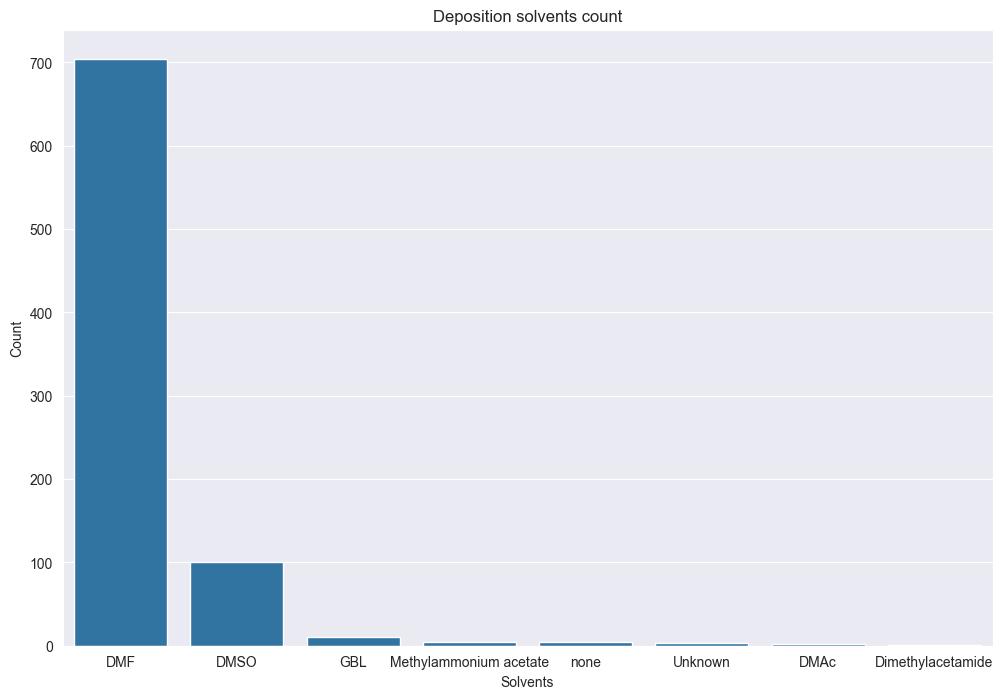

In [92]:
df_main["Perovskite_deposition_solvents"] = df_main["Perovskite_deposition_solvents"].str.strip()
plt.figure(figsize=(12, 8))
solvents_value_counts = df_main["Perovskite_deposition_solvents"].value_counts()
sns.barplot(x=solvents_value_counts.index, y=solvents_value_counts.values)
plt.title("Deposition solvents count")
plt.xlabel("Solvents")
plt.ylabel("Count")
plt.show()

In [100]:
df_main = df_main[~df_main["Perovskite_deposition_solvents"].isin(["none", "Unknown", "DMAC", "Methylammonium acetate", "Dimethylacetamide", "GBL", "DMAc"])]

In [101]:
solvents_value_counts = df_main["Perovskite_deposition_solvents"].value_counts()
solvents_value_counts

Perovskite_deposition_solvents
DMF     704
DMSO    101
Name: count, dtype: int64

In [102]:
df_main

,composition_long_form,composition_short_form,composition_inorganic,band_gap,A_1,A_2,A_3,A_1_coef,A_2_coef,A_3_coef,...,octahedral_factor,space_group,Perovskite_thickness,ETL_thickness,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_solvents,Cell_architecture,JV_hysteresis_index,JV_default_PCE,HTL_thickness
2,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,550,30.0,60.0,DMF,nip,0.045401,15.32,280.0
3,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,40.0,95.0,DMF,nip,0.338831,14.57,400.0
4,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,40.0,65.0,DMF,nip,0.169349,9.80,35.0
5,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,40.0,65.0,DMF,nip,0.126797,14.94,35.0
6,MAPbI3,MAPbI,0.0,1.60,MA,None,None,1.00,NaN,NaN,...,0.180303,Pnma,400,40.0,65.0,DMF,nip,0.162833,10.35,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,0.549908,Pm3m,550.0,15.0,80.0,DMF,nip,0.053829,13.68,200.0
1020,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,0.549908,Pm3m,550.0,15.0,80.0,DMF,nip,0.056700,13.33,200.0
1021,FA0.85MA0.15PbBr0.15I0.85,FAMAPbBrI,0.0,1.63,FA,MA,None,0.85,0.15,NaN,...,0.549908,Pm3m,550.0,15.0,80.0,DMF,nip,0.096320,11.05,200.0
1037,FA0.75MA0.25PbBr0.75I2.25,FAMAPbBrI,0.0,1.61,FA,MA,None,0.75,0.25,NaN,...,0.185358,I4/mcm,400.0,40.0,120.0,DMF,nip,0.163660,14.83,150.0


In [103]:
df_main = df_main.drop(columns=["A_3", "A_3_coef"])

In [112]:
df_main["Perovskite_thickness"] = df_main["Perovskite_thickness"].astype(float)
df_main = df_main.drop(columns=["space_group"])
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Index: 805 entries, 2 to 1038
Data columns (total 31 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   composition_long_form                                805 non-null    object 
 1   composition_short_form                               805 non-null    object 
 2   composition_inorganic                                805 non-null    float64
 3   band_gap                                             805 non-null    float64
 4   A_1                                                  805 non-null    object 
 5   A_2                                                  26 non-null     object 
 6   A_1_coef                                             805 non-null    float64
 7   A_2_coef                                             26 non-null     float64
 8   B_1                                                  805 non-null    objec

#### Build model

In [113]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from xgboost import XGBRegressor

X, y = df_main.drop(columns=["JV_default_PCE"]), df_main["JV_default_PCE"].values

numerical_features = [col for col in X.columns if X[col].dtype != np.object_]
categorical_features = [col for col in X.columns if col not in numerical_features]

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(objective='reg:squarederror', random_state=42))
])
model_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['composition_inorganic',
                                                   'band_gap', 'A_1_coef',
                                                   'A_2_coef', 'B_1_coef',
                                                   'B_2_coef', 'C_1_coef',
                                                   'C_2_coef',
                                                   'dimension_list_of_layers',
                                                   'r_A', 'r_B', 'r_C',
                                                   'tolerance_factor',
                                                   'octahedral_factor',
                                                   'Perovskite_thickness',
                                                   'ETL_thickness',
                                                   'Perovsk...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

In [116]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    "regressor__n_estimators": [500, 600, 700, 750],
    "regressor__learning_rate": [0.06, 0.07, 0.08, 0.1],
    "regressor__min_child_weight": [0.05, .08, 0.1],
    "regressor__gamma": [0.01],
    "regressor__subsample": [0.4, 0.5],
    "regressor__colsample_bytree": [0.1, 0.2, 0.3],
}

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=1
)

print("Starting GridSearchCV... This may take a while.")
grid_search.fit(X_train, y_train)

y_pred = grid_search.best_estimator_.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# (The grid_search object is now our "model")
print("\n--- GridSearch Complete ---")
print(f"Best RMSE Score: {rmse:.4f}")
print(f"Best R2: {r2:.4f}")
print(f"Params: {grid_search.best_params_}")

Starting GridSearchCV... This may take a while.
Fitting 5 folds for each of 288 candidates, totalling 1440 fits


/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-pac


--- GridSearch Complete ---
Best RMSE Score: 2.3539
Best R2: 0.6503
Params: {'regressor__colsample_bytree': 0.3, 'regressor__gamma': 0.01, 'regressor__learning_rate': 0.06, 'regressor__min_child_weight': 0.05, 'regressor__n_estimators': 700, 'regressor__subsample': 0.4}


In [118]:
model_pipeline = grid_search.best_estimator_
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("\n--- Fit result of model ---")
print(f"Best RMSE Score: {rmse:.4f}")
print(f"Best R2: {r2:.4f}")
model_pipeline

/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/ahovhannisyan/perovskite/perovskite_data_analysis/venv/lib/python3.13/site-packages/sklearn/utils/extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count



--- Fit result of model ---
Best RMSE Score: 2.3539
Best R2: 0.6503


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['composition_inorganic',
                                                   'band_gap', 'A_1_coef',
                                                   'A_2_coef', 'B_1_coef',
                                                   'B_2_coef', 'C_1_coef',
                                                   'C_2_coef',
                                                   'dimension_list_of_layers',
                                                   'r_A', 'r_B', 'r_C',
                                                   'tolerance_factor',
                                                   'octahedral_factor',
                                                   'Perovskite_thickness',
                                                   'ETL_thickness',
                                                   'Perovsk...
                              feature_types=None, gamma=0.01, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.06,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=0.05, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=700, n_jobs=None,
                              num_parallel_tree=None, random_state=42, ...))])

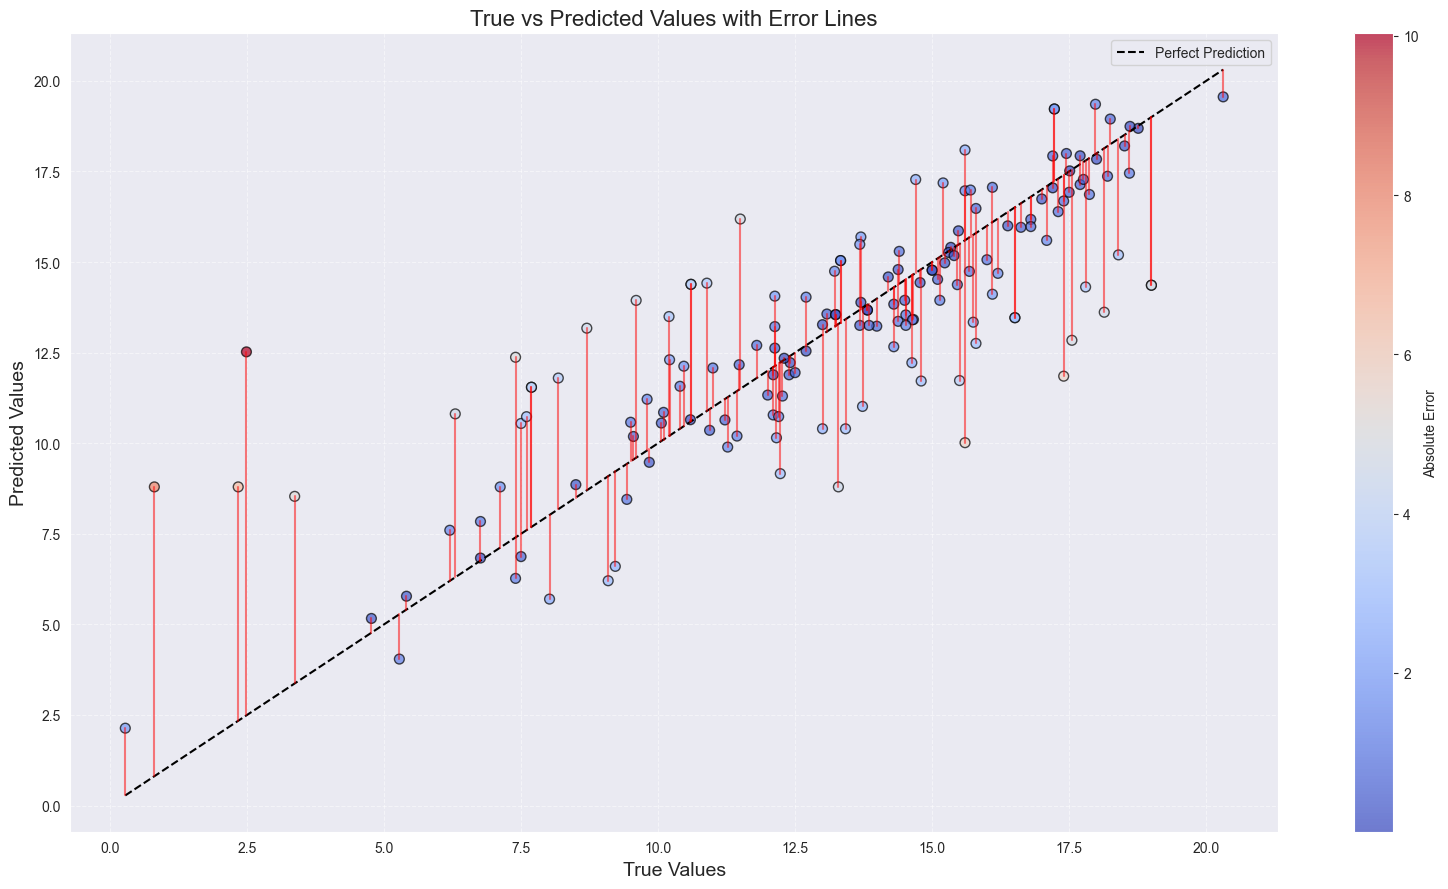

In [119]:
errors = np.abs(y_test - y_pred)

plt.figure(figsize=(16, 9))
scatter = plt.scatter(y_test, y_pred, c=errors, cmap='coolwarm', s=50, alpha=0.7, edgecolor='k')

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'k--', label='Perfect Prediction')

for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], 'r-', alpha=0.5)

plt.xlabel('True Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.title('True vs Predicted Values with Error Lines', fontsize=16)
plt.colorbar(scatter, label='Absolute Error')
plt.legend()

plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [120]:
from joblib import dump

dump(model_pipeline, "../ml_models/pce_jv_model.joblib")

['../ml_models/pce_jv_model.joblib']